In [1]:
import dask.distributed
import dask.utils
import numpy as np
import planetary_computer as pc
import xarray as xr
from IPython.display import display
from pystac_client import Client
import geopandas as gpd
import requests
from pystac.extensions.eo import EOExtension as eo
from odc.stac import configure_rio, stac_load
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


In [2]:
client = dask.distributed.Client()
configure_rio(cloud_defaults=True, client=client)
display(client)

/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38311 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:44837' processes=4 threads=12, memory=15.45 GiB>

In [11]:
resolution = 10

In [12]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1",modifier=pc.sign_inplace)
hel_mel = gpd.read_file('/media/laserglaciers/upernavik/iceberg_py/geoms/helheim/melange_box.shp')


query = catalog.search(
    collections=["sentinel-2-l2a"],
    datetime="2023-07",
    query={"s2:mgrs_tile": dict(eq="24WWU"),
          "eo:cloud_cover": {"lt": 10}},
)

items = list(query.items())
print(f"Found: {len(items):d} datasets")

Found: 5 datasets


In [13]:
items
selected_item = sorted(items, key=lambda item: eo.ext(item).cloud_cover)[-1]
selected_item

<Item id=S2A_MSIL2A_20230727T142031_R096_T24WWU_20230727T223047>

In [14]:
selected_items = []
selected_items.append(selected_item)

In [15]:
query = catalog.search(
    collections=["sentinel-2-l2a"],
    datetime="2020-09",
    query={"s2:mgrs_tile": dict(eq="24WWU"),
          "eo:cloud_cover": {"lt": 10}},
)

items = list(query.items())
print(f"Found: {len(items):d} datasets")
selected_item = sorted(items, key=lambda item: eo.ext(item).cloud_cover)[0]
selected_item

print(
    f"Choosing {selected_item.id} from {selected_item.datetime.date()}"
    + f" with {selected_item.properties['eo:cloud_cover']}% cloud cover"
)

Found: 5 datasets
Choosing S2A_MSIL2A_20200903T142941_R139_T24WWU_20201027T151835 from 2020-09-03 with 1.604345% cloud cover


In [16]:
selected_items.append(selected_item)
selected_items

[<Item id=S2A_MSIL2A_20230727T142031_R096_T24WWU_20230727T223047>,
 <Item id=S2A_MSIL2A_20200903T142941_R139_T24WWU_20201027T151835>]

In [17]:
query = catalog.search(
    collections=["sentinel-2-l2a"],
    datetime="2018-05",
    query={"s2:mgrs_tile": dict(eq="24WWU"),
          "eo:cloud_cover": {"lt": 10}},
)

items = list(query.items())
print(f"Found: {len(items):d} datasets")
selected_item = sorted(items, key=lambda item: eo.ext(item).cloud_cover)[0]
selected_item

print(
    f"Choosing {selected_item.id} from {selected_item.datetime.date()}"
    + f" with {selected_item.properties['eo:cloud_cover']}% cloud cover"
)

Found: 3 datasets
Choosing S2A_MSIL2A_20180504T141951_R096_T24WWU_20201012T054158 from 2018-05-04 with 4.556956% cloud cover


Bands: red,green,blue,nir


<xarray.Dataset> Size: 103MB
Dimensions:      (y: 1481, x: 2891, time: 3)
Coordinates:
  * y            (y) float64 12kB 7.365e+06 7.365e+06 ... 7.351e+06 7.351e+06
  * x            (x) float64 23kB 5.325e+05 5.325e+05 ... 5.614e+05 5.614e+05
    spatial_ref  int32 4B 32624
  * time         (time) datetime64[ns] 24B 2018-05-04T14:19:51.024000 ... 201...
Data variables:
    red          (time, y, x) uint16 26MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    green        (time, y, x) uint16 26MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    blue         (time, y, x) uint16 26MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    nir          (time, y, x) uint16 26MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>

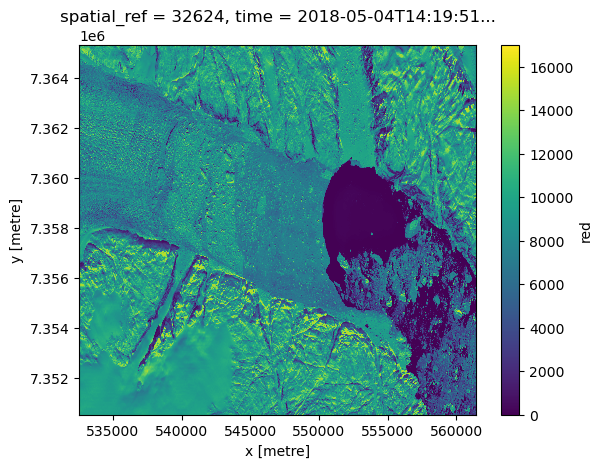

In [18]:
xx = stac_load(
    items,
    bands=["red", "green", "blue", "nir"],
    resolution=resolution,
    chunks={"x": 2048, "y": 2048},
    patch_url=pc.sign,
    # force dtype and nodata
    dtype="uint16",
    nodata=0,
    geopolygon=hel_mel
)

print(f"Bands: {','.join(list(xx.data_vars))}")
display(xx)
xx.red.isel(time=0).plot()

In [19]:
selected_items.append(selected_item)
selected_items

[<Item id=S2A_MSIL2A_20230727T142031_R096_T24WWU_20230727T223047>,
 <Item id=S2A_MSIL2A_20200903T142941_R139_T24WWU_20201027T151835>,
 <Item id=S2A_MSIL2A_20180504T141951_R096_T24WWU_20201012T054158>]

In [20]:
query = catalog.search(
    collections=["sentinel-2-l2a"],
    datetime="2024-08",
    query={"s2:mgrs_tile": dict(eq="24WWU"),
          "eo:cloud_cover": {"lt": 10}},
)

items = list(query.items())
print(f"Found: {len(items):d} datasets")
selected_item = sorted(items, key=lambda item: eo.ext(item).cloud_cover)[3]
selected_item

print(
    f"Choosing {selected_item.id} from {selected_item.datetime.date()}"
    + f" with {selected_item.properties['eo:cloud_cover']}% cloud cover"
)

Found: 5 datasets
Choosing S2B_MSIL2A_20240822T140729_R053_T24WWU_20240822T195417 from 2024-08-22 with 6.577932% cloud cover


Bands: red,green,blue,nir


<xarray.Dataset> Size: 171MB
Dimensions:      (y: 1481, x: 2891, time: 5)
Coordinates:
  * y            (y) float64 12kB 7.365e+06 7.365e+06 ... 7.351e+06 7.351e+06
  * x            (x) float64 23kB 5.325e+05 5.325e+05 ... 5.614e+05 5.614e+05
    spatial_ref  int32 4B 32624
  * time         (time) datetime64[ns] 40B 2024-08-02T14:07:39.024000 ... 202...
Data variables:
    red          (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    green        (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    blue         (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    nir          (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>

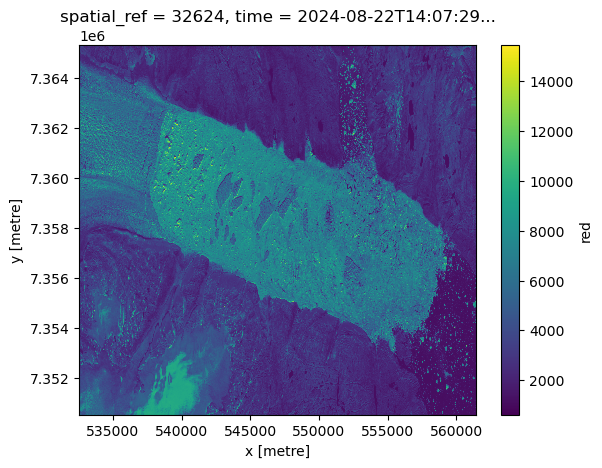

In [21]:
xx = stac_load(
    items,
    bands=["red", "green", "blue", "nir"],
    resolution=resolution,
    chunks={"x": 2048, "y": 2048},
    patch_url=pc.sign,
    # force dtype and nodata
    dtype="uint16",
    nodata=0,
    geopolygon=hel_mel
)

print(f"Bands: {','.join(list(xx.data_vars))}")
display(xx)
xx.red.isel(time=3).plot()

In [22]:
resolution = 10
SHRINK = 1
if client.cluster.workers[0].memory_manager.memory_limit < dask.utils.parse_bytes("4G"):
    SHRINK = 8  # running on Binder with 2Gb RAM

if SHRINK > 1:
    resolution = resolution * SHRINK

xx = stac_load(
    items,
    chunks={"x": 2048, "y": 2048},
    patch_url=pc.sign,
    resolution=resolution,
    # force dtype and nodata
    dtype="uint16",
    nodata=0,
)

print(f"Bands: {','.join(list(xx.data_vars))}")
display(xx)

Bands: AOT,B01,B02,B03,B04,B05,B06,B07,B08,B09,B11,B12,B8A,SCL,WVP,visual


<xarray.Dataset> Size: 19GB
Dimensions:      (y: 10980, x: 10980, time: 5)
Coordinates:
  * y            (y) float64 88kB 7.4e+06 7.4e+06 7.4e+06 ... 7.29e+06 7.29e+06
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
    spatial_ref  int32 4B 32624
  * time         (time) datetime64[ns] 40B 2024-08-02T14:07:39.024000 ... 202...
Data variables: (12/16)
    AOT          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B01          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B02          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B03          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B04          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B05          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    ...           ...
    B11          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B12          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B8A          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    SCL          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    WVP          (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    visual       (time, y, x) uint16 1GB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>

In [23]:
selected_items.append(selected_item)
selected_items

[<Item id=S2A_MSIL2A_20230727T142031_R096_T24WWU_20230727T223047>,
 <Item id=S2A_MSIL2A_20200903T142941_R139_T24WWU_20201027T151835>,
 <Item id=S2A_MSIL2A_20180504T141951_R096_T24WWU_20201012T054158>,
 <Item id=S2B_MSIL2A_20240822T140729_R053_T24WWU_20240822T195417>]

In [31]:
query = catalog.search(
    collections=["sentinel-2-l2a"],
    datetime="2016-04",
    query={"s2:mgrs_tile": dict(eq="24WWU"),
          "eo:cloud_cover": {"lt": 10}},
)

items = list(query.items())
print(f"Found: {len(items):d} datasets")
selected_item = sorted(items, key=lambda item: eo.ext(item).cloud_cover)[1]
selected_item

print(
    f"Choosing {selected_item.id} from {selected_item.datetime.date()}"
    + f" with {selected_item.properties['eo:cloud_cover']}% cloud cover"
)

Found: 5 datasets
Choosing S2A_MSIL2A_20160424T142002_R096_T24WWU_20210211T060552 from 2016-04-24 with 2.121068% cloud cover


Bands: red,green,blue,nir


<xarray.Dataset> Size: 171MB
Dimensions:      (y: 1481, x: 2891, time: 5)
Coordinates:
  * y            (y) float64 12kB 7.365e+06 7.365e+06 ... 7.351e+06 7.351e+06
  * x            (x) float64 23kB 5.325e+05 5.325e+05 ... 5.614e+05 5.614e+05
    spatial_ref  int32 4B 32624
  * time         (time) datetime64[ns] 40B 2016-04-04T14:19:52.030000 ... 201...
Data variables:
    red          (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    green        (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    blue         (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    nir          (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>

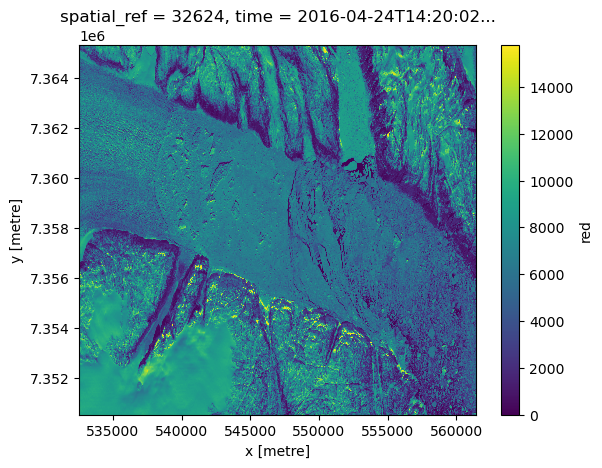

In [32]:
xx = stac_load(
    items,
    bands=["red", "green", "blue", "nir"],
    resolution=resolution,
    chunks={"x": 2048, "y": 2048},
    patch_url=pc.sign,
    # force dtype and nodata
    dtype="uint16",
    nodata=0,
    geopolygon=hel_mel
)

print(f"Bands: {','.join(list(xx.data_vars))}")
display(xx)
xx.red.isel(time=4).plot()

In [34]:
selected_items.append(selected_item)
selected_items

[<Item id=S2A_MSIL2A_20230727T142031_R096_T24WWU_20230727T223047>,
 <Item id=S2A_MSIL2A_20200903T142941_R139_T24WWU_20201027T151835>,
 <Item id=S2A_MSIL2A_20180504T141951_R096_T24WWU_20201012T054158>,
 <Item id=S2B_MSIL2A_20240822T140729_R053_T24WWU_20240822T195417>,
 <Item id=S2A_MSIL2A_20160424T142002_R096_T24WWU_20210211T060552>]

In [35]:

import pickle

with open('/media/laserglaciers/upernavik/iceberg_py/infiles/helheim/stac_items/helheim_stac_items.pkl', 'wb') as f:
    pickle.dump(selected_items, f)

Bands: red,green,blue,nir


<xarray.Dataset> Size: 171MB
Dimensions:      (y: 1481, x: 2891, time: 5)
Coordinates:
  * y            (y) float64 12kB 7.365e+06 7.365e+06 ... 7.351e+06 7.351e+06
  * x            (x) float64 23kB 5.325e+05 5.325e+05 ... 5.614e+05 5.614e+05
    spatial_ref  int32 4B 32624
  * time         (time) datetime64[ns] 40B 2020-09-03T14:29:41.024000 ... 202...
Data variables:
    red          (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    green        (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    blue         (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>
    nir          (time, y, x) uint16 43MB dask.array<chunksize=(1, 1481, 2048), meta=np.ndarray>

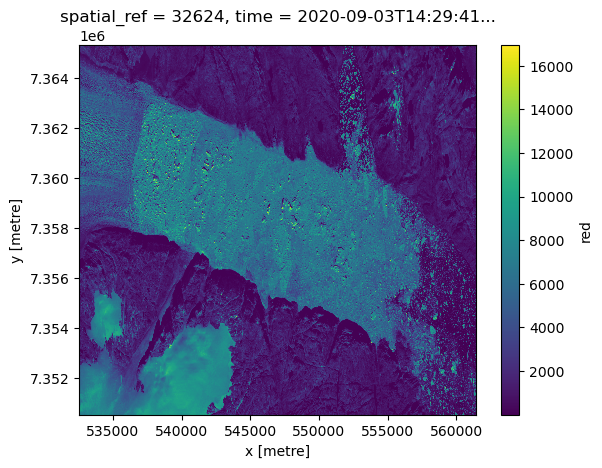

In [114]:
xx = stac_load(
    items,
    bands=["red", "green", "blue", "nir"],
    resolution=resolution,
    chunks={"x": 2048, "y": 2048},
    patch_url=pc.sign,
    # force dtype and nodata
    dtype="uint16",
    nodata=0,
    geopolygon=hel_mel
)

print(f"Bands: {','.join(list(xx.data_vars))}")
display(xx)
xx.red.isel(time=0).plot()


In [113]:
def to_float(xx):
    _xx = xx.astype("float32")
    nodata = _xx.attrs.pop("nodata", None)
    if nodata is None:
        return _xx
    return _xx.where(xx != nodata)


def colorize(xx, colormap):
    return xr.DataArray(colormap[xx.data], coords=xx.coords, dims=(*xx.dims, "band"))

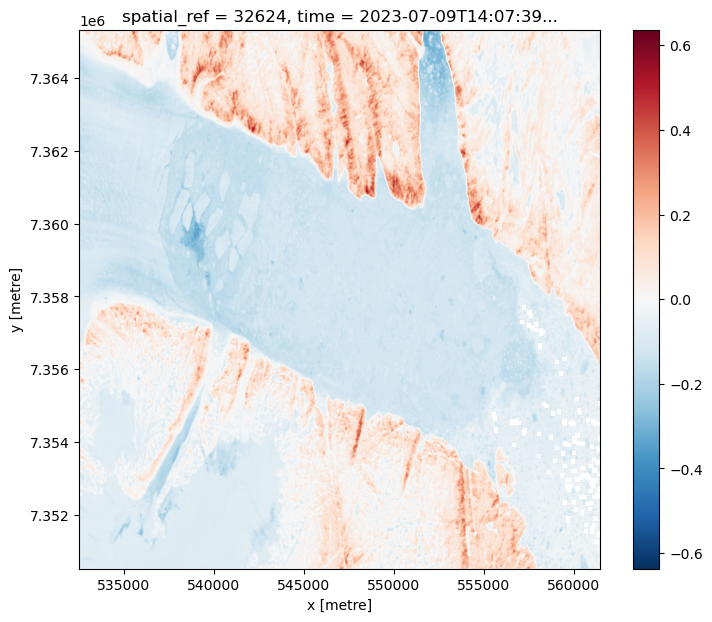

In [103]:
# like .astype(float32) but taking care of nodata->NaN mapping
nir = to_float(xx.nir)
red = to_float(xx.red)
ndvi = (nir - red) / (
    nir + red
)  # < This is still a lazy Dask computation (no data loaded yet)

# Get the 5-th time slice `load->compute->plot`
_ = ndvi.isel(time=1).compute().plot.imshow(size=7, aspect=1.2, interpolation="bicubic")

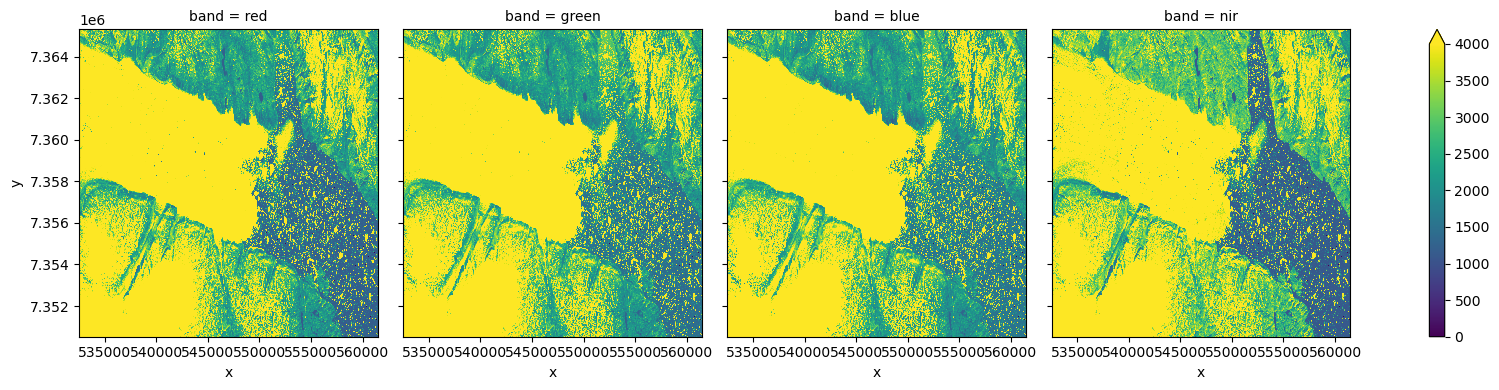

In [15]:
# xx.isel(time=4).compute().plot.imshow(size=7, aspect=1.2, interpolation="bicubic")

_ = (
    xx.isel(time=0)
    .to_array("band")
    .plot.imshow(
        col="band",
        size=4,
        vmin=0,
        vmax=4000,
    )
)


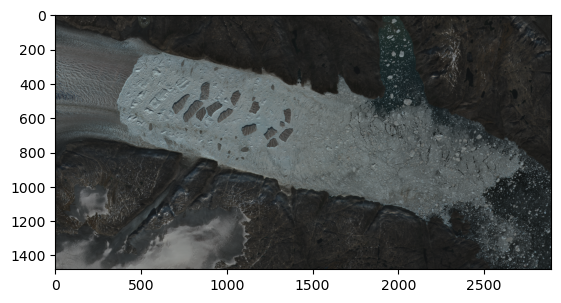

In [16]:
time=4
rgb = np.dstack((xx.red.isel(time=time).values,
                 xx.green.isel(time=time).values,
                 xx.blue.isel(time=time).values))
# Normalize the RGB data
rgb_norm = rgb / rgb.max()

# Display the normalized RGB image using plt.imshow
plt.imshow(rgb_norm)

In [17]:
xx.isel(time=0).odc.affine

Affine(10.0, 0.0, 532530.0,
       0.0, -10.0, 7365330.0)

In [18]:
items[0].assets['B02'].href

'https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/24/W/WU/2023/07/27/S2A_MSIL2A_20230727T142031_N0509_R096_T24WWU_20230727T223047.SAFE/GRANULE/L2A_T24WWU_A042278_20230727T142256/IMG_DATA/R10m/T24WWU_20230727T142031_B02_10m.tif?st=2024-08-26T15%3A30%3A37Z&se=2024-08-28T15%3A30%3A37Z&sp=rl&sv=2024-05-04&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2024-08-27T06%3A23%3A05Z&ske=2024-09-03T06%3A23%3A05Z&sks=b&skv=2024-05-04&sig=E8FTdD6wSv/QF%2BhYpuS/ck30f7hytrwXYvqYvdB8zRM%3D'

In [19]:
requests.head(items[0].assets['B02'].href).status_code


200

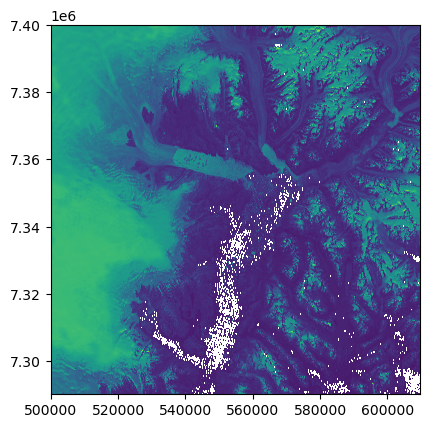

In [20]:
import rasterio.plot
with rasterio.open(items[0].assets['B02'].href) as dataset:
    rasterio.plot.show(dataset)

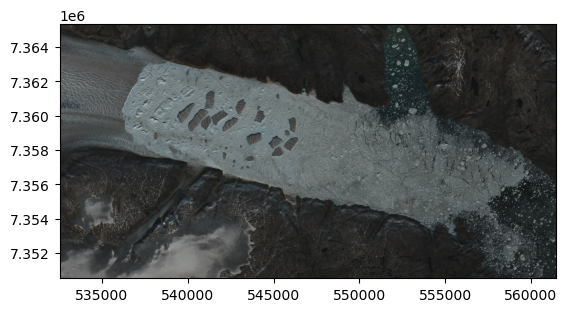

<Axes: >

In [149]:
from rasterio.plot import show
import numpy as np

affine = xx.red.isel(time=time).odc.affine

#better for rasterio?
t = np.moveaxis(rgb_norm.T,1,-1)
show(t, transform=affine)

In [160]:
t.dtype

dtype('float64')

In [157]:
height, width = xx.red.isel(time=time).shape


2891

In [22]:
from rasterio.features import geometry_mask, geometry_window

In [23]:
grid_path = '/media/laserglaciers/upernavik/iceberg_py/geoms/helheim/3x6_grid.shp'
grid = gpd.read_file(grid_path)
grid.geometry

0     POLYGON ((307795.677 -2575064.962, 310795.677 ...
1     POLYGON ((307795.677 -2581064.962, 310795.677 ...
2     POLYGON ((310795.677 -2575064.962, 313795.677 ...
3     POLYGON ((310795.677 -2581064.962, 313795.677 ...
4     POLYGON ((313795.677 -2575064.962, 316795.677 ...
5     POLYGON ((313795.677 -2581064.962, 316795.677 ...
6     POLYGON ((316795.677 -2575064.962, 319795.677 ...
7     POLYGON ((316795.677 -2581064.962, 319795.677 ...
8     POLYGON ((319795.677 -2575064.962, 322795.677 ...
9     POLYGON ((319795.677 -2581064.962, 322795.677 ...
10    POLYGON ((322795.677 -2575064.962, 325795.677 ...
11    POLYGON ((322795.677 -2581064.962, 325795.677 ...
12    POLYGON ((325795.677 -2575064.962, 328795.677 ...
13    POLYGON ((325795.677 -2581064.962, 328795.677 ...
14    POLYGON ((328795.677 -2575064.962, 331795.677 ...
15    POLYGON ((328795.677 -2581064.962, 331795.677 ...
16    POLYGON ((331795.677 -2575064.962, 334795.677 ...
17    POLYGON ((331795.677 -2581064.962, 334795.

In [24]:
from contextlib import contextmanager  
import rasterio
from rasterio import Affine, MemoryFile
from rasterio.enums import Resampling
from rasterio.windows import Window
import cv2
from segment_anything import SamPredictor, SamAutomaticMaskGenerator,sam_model_registry

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import torch


In [25]:
#https://rasterio.groups.io/g/main/topic/memoryfile_workflow_should/32634761
@contextmanager
def mem_raster(data, **profile):
    with MemoryFile() as memfile:
        with memfile.open(**profile) as dataset_writer:
            dataset_writer.write(data)
 
        with memfile.open() as dataset_reader:
            yield dataset_reader

def cv2Norm(band):
    img_u8 = cv2.normalize(band, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
    return img_u8

profile_t = {'driver':'GTiff', 'count':3, 
                      'transform':affine, 'crs':32624, 
                      'width':t.shape[2], 'height': t.shape[1], 
                      'dtype':np.float64
}

In [26]:
grid2_path = '/media/laserglaciers/upernavik/iceberg_py/geoms/helheim/melange_box_grid_utm24.shp'
grid2 = gpd.read_file(grid2_path)

for geom in grid2.geometry:
    print(geom)

POLYGON ((533058.3408544008 7363945.687788265, 537058.3408544008 7363945.687788265, 537058.3408544008 7354945.687788265, 533058.3408544008 7354945.687788265, 533058.3408544008 7363945.687788265))
POLYGON ((537058.3408544008 7363945.687788265, 541058.3408544008 7363945.687788265, 541058.3408544008 7354945.687788265, 537058.3408544008 7354945.687788265, 537058.3408544008 7363945.687788265))
POLYGON ((541058.3408544008 7363945.687788265, 545058.3408544008 7363945.687788265, 545058.3408544008 7354945.687788265, 541058.3408544008 7354945.687788265, 541058.3408544008 7363945.687788265))
POLYGON ((545058.3408544008 7363945.687788265, 549058.3408544008 7363945.687788265, 549058.3408544008 7354945.687788265, 545058.3408544008 7354945.687788265, 545058.3408544008 7363945.687788265))
POLYGON ((549058.3408544008 7363945.687788265, 553058.3408544008 7363945.687788265, 553058.3408544008 7354945.687788265, 549058.3408544008 7354945.687788265, 549058.3408544008 7363945.687788265))
POLYGON ((549058.340

In [93]:
def sam_segment(image_chunk):
    FEATURE_OF_INTEREST = 'icebergs' #icebergs,crevasse,terminus,supraglacial_lakes,planet, sentinel-2, sentinel-1, timelapse
    MODEL_TYPE = 'vit_h'
    MODEL_WEIGHTS = 'sam_vit_h_4b8939.pth' # sam_vit_b_01ec64.pth,sam_vit_h_4b8939.pth,sam_vit_l_0b3195.pth
    OUTPUT_FOLDER = 'predict_no_prompt' # predict_with_prompt, predict_no_prompt
    
    BASE_PATH = f'/media/laserglaciers/upernavik/Helheim_ortho_photos/ortho_images/jpgs/'
    # OUTPUT_PATH = os.path.join(BASE_PATH,'%s'%(OUTPUT_FOLDER))
    OUTPUT_PATH = f'{BASE_PATH}/OUTPUT_FOLDER'
    fileName = '7P14_M42_A4545V_239_ortho.jpg'

    sam = sam_model_registry["%s"%(MODEL_TYPE)](checkpoint="/media/laserglaciers/upernavik/segment-anything/models/%s"%(MODEL_WEIGHTS))
    predictor = SamPredictor(sam)
    predictor.set_image(image_chunk)


    mask_generator = SamAutomaticMaskGenerator(sam)
    
    masks = mask_generator.generate(image_chunk)
    out_path = '/media/laserglaciers/upernavik/iceberg_py/outfiles/helheim/sam_output/2023_07_27.png'
    if FEATURE_OF_INTEREST == 'terminus':
        for num in range(len(masks)):
            im = Image.fromarray(masks[num]['segmentation'])
            im.save(f'{OUTPUT_PATH}/{fileName.split(".")[0]}{num}_predict.png')
    
    else:
        binary_pred_zeros = np.zeros_like(masks[1]['segmentation'])
        for num in range(len(masks)):
            # 25% or higher number of pixels are True, that means it is a potential representation of background
            # and not of icebergs
            if np.count_nonzero(masks[num]['segmentation'])>(0.25*(masks[num]['segmentation']).size):
                continue
            else:               
                binary_pred_zeros[masks[num]['segmentation']==1]=1
        im = Image.fromarray(binary_pred_zeros)
        # # im.save(f'{OUTPUT_PATH}/{fileName.split(".")[0]}_predict_{MODEL_TYPE}.png')
        # im.save(f'{out_path}')

    
    return im

In [94]:
grid2_path = '/media/laserglaciers/upernavik/iceberg_py/geoms/helheim/melange_box_grid_utm24.shp'
grid2 = gpd.read_file(grid2_path)
image_chunk_dict = {}
date = str(xx.red.isel(time=time).time.dt.date.data)

with mem_raster(t, **profile_t) as ds:
    for i, geom in enumerate(grid2.geometry): 
        window = geometry_window(ds, [geom])
        w = ds.read([1,2,3], window=window)
        win_transform = ds.window_transform(window)
        w2 = np.moveaxis(w,0,-1)
        # show(w,transform=win_transform)
        image_chunk_dict[win_transform] = w
        im = sam_segment(w2)
        
        nim = np.array(im)
        profile_out = {'driver':'GTiff', 'count':1, 
                      'transform':win_transform, 'crs':32624, 
                      'width':nim.shape[1], 'height': nim.shape[0], 
                      'dtype':np.float64
                        }
        out_name = f'{date}_helheim_{i}.tif'
        with rasterio.open(f'/media/laserglaciers/upernavik/iceberg_py/outfiles/helheim/sam_output/{out_name}', mode='w', **profile_out) as dst:
            dst.write(nim,1)

2024-08-27 13:01:13,650 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/site-packages/distributed/worker.py", line 1252, in heartbeat
    response = await retry_operation(
  File "/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/site-packages/distributed/utils_comm.py", line 455, in retry_operation
    return await retry(
  File "/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/site-packages/distributed/utils_comm.py", line 434, in retry
    return await coro()
  File "/home/laserglaciers/

KeyboardInterrupt: 

2024-08-27 13:01:15,745 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/site-packages/distributed/process.py", line 202, in _run
    target(*args, **kwargs)
  File "/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/site-packages/distributed/nanny.py", line 1021, in _run
    asyncio_run(run(), loop_factory=get_loop_factory())
  File "/home/laserglaciers/anaconda3/envs/py310v2/lib/python3.10/site-packages/distributed/compatibility.py", line 236, in asyncio_run
    return loop.run_until_complete(main)
  File "/home/laserglaciers/anaconda3/

In [90]:
date = xx.red.isel(time=time).time.dt.date.compute()
str(xx.red.isel(time=time).time.dt.date.data)

'2023-07-27'

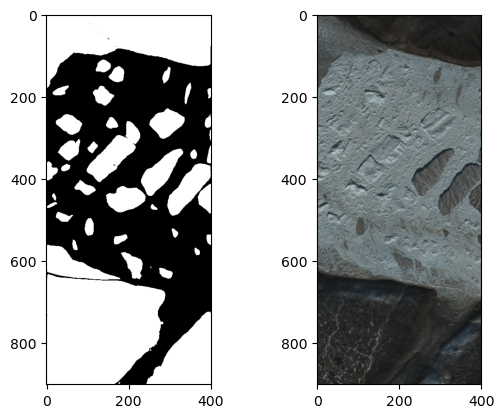

In [39]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(im)
ax[1].imshow(w2)

In [40]:
im.save('/media/laserglaciers/upernavik/iceberg_py/outfiles/helheim/sam_output/test2.png',"PNG")

In [41]:
type(im)

PIL.Image.Image

In [45]:
nim = np.array(im)

In [59]:
nim.shape

(901, 401)

In [68]:
with rasterio.open('/media/laserglaciers/upernavik/iceberg_py/outfiles/helheim/sam_output/test2.tif', mode='w', **profile_out) as dst:
    dst.write(nim,1)

In [69]:
win_transform

Affine(10.0, 0.0, 537050.0,
       0.0, -10.0, 7363950.0)

In [70]:
w.shape

(3, 901, 401)

In [71]:
profile_out = {'driver':'GTiff', 'count':3, 
                      'transform':win_transform, 'crs':32624, 
                      'width':w.shape[2], 'height': w.shape[1], 
                      'dtype':np.float64
}
with rasterio.open('/media/laserglaciers/upernavik/iceberg_py/outfiles/helheim/sam_output/test2_rbg.tif', mode='w', **profile_out) as dst:
    dst.write(w[0,:,:],1)
    dst.write(w[1,:,:],2)
    dst.write(w[2,:,:],2)